<a href="https://colab.research.google.com/github/2286-SANA/Hand-Written-Digit-Recognition-/blob/main/HWDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# This is multiclass classification problem
from keras.datasets import mnist
dataset = mnist.load_data('mnist.db')

In [6]:
# This is multiclass classification problem
from keras.datasets import mnist
dataset = mnist.load_data('mnist.db')

In [7]:
train, test = dataset
X_train, y_train = train
X_test, y_test = test

In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [37]:
# 1st image
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [38]:
# Check shape 
X_train[1].shape

(28, 28)

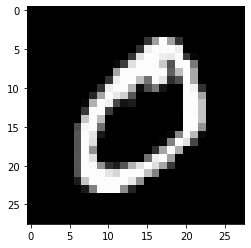

In [39]:
# Visualize
import matplotlib.pyplot as plt 
plt.imshow(X_train[1], cmap='gray')

In [40]:
print(y_train[1])  # Actual label for above image

0


In [41]:
# Convert 2D image to 1D 
X_train.shape
# 60000 records of 2D 28 X 28 shape

(60000, 28, 28)

In [43]:
# Reshaping training data
X_train_1d = X_train.reshape(60000, 28*28) 
X_train_1d.shape

(60000, 784)

In [44]:
# reshaping test data
X_test_1d = X_test.reshape(-1, 28*28) 
X_test_1d.shape

(10000, 784)

In [45]:
# convert target y to dummy variable 
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)

In [46]:
# 10 different classes 0 - 9. 
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [47]:
# Creating model 
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense

In [48]:
model.add(
    Dense(
        units = 512, #
        input_dim=28*28,
        activation="relu"
    )
)
model.add(
    Dense(
        units=256, 
        activation="relu"
    )
)
model.add(
    Dense(
        units=128, 
        activation="relu"
    )
)
model.add(
    Dense(
        units=64, 
        activation="relu"
    )
)
model.add(
    Dense(
        units=32, 
        activation="relu"
    )
)
model.add(
    Dense(
        units=16, 
        activation="relu"
    )
)
model.add(
    Dense(
        units=10, 
        activation="softmax"
    )
)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 10)                1

In [49]:
# Compile Model 
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.fit(X_train_1d, y_train_cat, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 16s 8ms/step - loss: 0.5430 - accuracy: 0.8610
Epoch 2/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1827 - accuracy: 0.9514
Epoch 3/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1327 - accuracy: 0.9636
Epoch 4/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0983 - accuracy: 0.9723
Epoch 5/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0866 - accuracy: 0.9762
Epoch 6/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0701 - accuracy: 0.9808
Epoch 7/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0605 - accuracy: 0.9834
Epoch 8/50
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0527 - accuracy: 0.9857
Epoch 9/50
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0480 - accuracy: 0.9864
Epoch 10/50
1875/1875 [==============================] - 15s 8ms/step - l

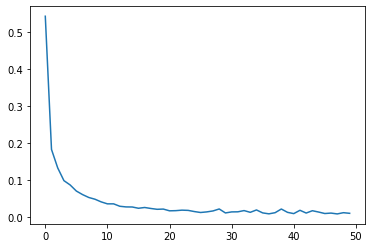

In [50]:
loss = model.history.history["loss"]
import matplotlib.pyplot as plt 
plt.plot(loss)

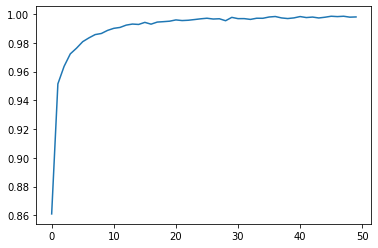

In [51]:
acc = model.history.history["accuracy"]
plt.plot(acc)

In [52]:
model.save("mnist-acc-0.9991.h5")

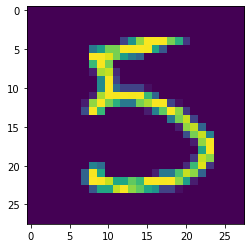

In [54]:
# Testing
imgTest = X_test[15]
plt.imshow(imgTest)

In [55]:
sample = imgTest.reshape(1, 28*28)
pred = model.predict(sample)

In [56]:
pred


array([[1.0705245e-13, 0.0000000e+00, 1.7477384e-38, 8.3706723e-35,
        1.2049021e-36, 1.0000000e+00, 5.5605914e-14, 0.0000000e+00,
        2.3295601e-09, 6.8593112e-20]], dtype=float32)

In [57]:
import numpy as np 
max_val = np.amax(pred)

In [58]:
result = np.where(pred == np.amax(pred))
max(result)

array([5])

In [59]:
model_predictions = model.predict(X_test_1d)
result = np.where(model_predictions == np.amax(model_predictions))
index = result[1]

In [60]:
index # Predictions

array([7, 2, 0, ..., 3, 5, 6])

In [61]:
y_test # Actual answers

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [62]:
from sklearn.metrics import confusion_matrix

In [63]:
matrix=confusion_matrix(y_test[:2], index[:2])

In [64]:
matrix

array([[1, 0],
       [0, 1]])